In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import talib
from sklearn.model_selection import train_test_split

In [2]:
data=yf.download('^HSI','2019-01-01','2022-01-01')
data.drop('Volume',1,inplace=True)
data

[*********************100%***********************]  1 of 1 completed


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_94869/178164014.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('Volume',1,inplace=True)


,Open,High,Low,Close,Adj Close
Date,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219
...,...,...,...,...,...
2021-12-24,23375.990234,23383.189453,23186.570312,23223.759766,23223.759766
2021-12-28,23282.349609,23319.439453,23099.480469,23280.560547,23280.560547
2021-12-29,23253.980469,23253.980469,23008.279297,23086.539062,23086.539062


In [3]:
data['6day MA'] = data['Close'].rolling(window = 6).mean()
data['12day MA'] = data['Close'].rolling(window = 12).mean()
data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
data['%R5'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 5)
data['%R10'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 10)
data['MI6']=talib.MOM(data['Close'],timeperiod=6)
data['MI12']=talib.MOM(data['Close'],timeperiod=12)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
data['EMA26']=talib.EMA(data['Close'],timeperiod=26)
data['MACD']=macd
data['TR']=talib.TRANGE(data['High'],data['Low'],data['Close'])
data['OSC6']=talib.CMO(data['Close'], timeperiod=6)
data['OSC12']=talib.CMO(data['Close'], timeperiod=12)
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)

In [4]:
# data.drop(['OSC12','OSC6','MI12','MI6','%R10','%R5','RSI','TR'],1,inplace=True)
data_val=data[-100:]
data=data[:-100]
sc = MinMaxScaler(feature_range = (-1, 1))
# X=sc.fit_transform(data.drop('Prediction',1))
X=data.drop('Prediction',1).values
# Y = data["Prediction"].values.reshape(-1,1)
# Y = sc_y.fit_transform(data["Prediction"].values.reshape(-1,1))
Y=np.array(data["Prediction"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(485, 18) (485,) (122, 18) (122,)


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_94869/2761118840.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Prediction',1).values


In [5]:
clf = RandomForestRegressor()

In [6]:
model = clf.fit(X_train, y_train)

In [7]:
y_pred=model.predict(X_test)

In [8]:
y_pred

array([29054.36044922, 29083.7346875 , 29604.25003906, 29772.05767578,
       29849.52046875, 29892.83039063, 29866.67898438, 29961.50314453,
       29913.364375  , 29863.68457031, 29857.15837891, 29731.10326172,
       29817.12552734, 29013.43980469, 29525.23833984, 29088.84212891,
       29725.37566406, 29174.80744141, 29160.17236328, 28508.45306641,
       28609.31091797, 29020.75931641, 29329.52507812, 28659.38626953,
       28994.68814453, 28908.81462891, 28898.97919922, 29560.65082031,
       29056.40890625, 28816.1596875 , 28430.62369141, 28002.75085937,
       27589.63982422, 28044.59289063, 28117.56865234, 28538.23080078,
       28398.46082031, 29154.03564453, 28497.85285156, 29084.88914063,
       28484.34650391, 28409.67992187, 28417.40048828, 29066.58197266,
       28692.70121094, 29088.28029297, 29133.51734375, 29101.06353516,
       28537.50134766, 28603.06648437, 29075.35626953, 28996.68367187,
       28993.32126953, 29109.62892578, 29125.21203125, 28451.11984375,
      

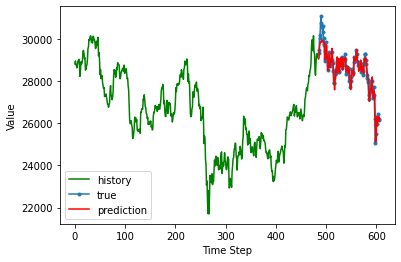

In [9]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [10]:
mean_absolute_percentage_error(y_test,y_pred)

0.01123700510319013

In [11]:
mean_squared_error(y_test,y_pred)

163568.77237351512

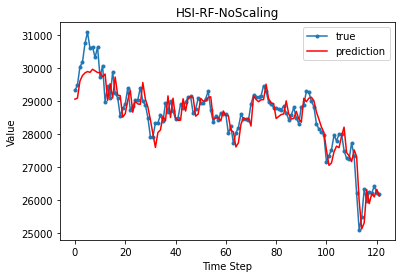

In [12]:
# y_test = sc.inverse_transform(y_test)
# y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-RF-NoScaling')
plt.legend()
plt.show();

In [13]:
mean_absolute_percentage_error(y_test,y_pred)

0.01123700510319013

In [14]:
mean_squared_error(y_test,y_pred,squared=False)

404.4363638120528

In [15]:
r2_score(y_test,y_pred)

0.8499864197404998